In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table,mcnemar_tables
from mlxtend.plotting import checkerboard_plot
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
# py.init_notebook_mode()

In [116]:
import numpy as np
import pandas as pd

In [117]:
file  = pd.read_csv(r"F:\Guided Project\RTA\Data SEt\RTA Dataset.csv")

In [118]:
file

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0               Automobile            Owner              Above 10yr   
1      Public (> 45 seats)            Owner                 5-10yrs   
2          Lorry (41?100Q)            Owner                     NaN   
3      Public (> 45 seats)     Governmental                     NaN   
4                      NaN            Owner                 5-10yrs   
...                    ...              ...                     ...   
12311       Lorry (11?40Q)            Owner                     NaN   
12312           Automobile            Owner                     NaN   
12313                Bajaj            Owner                  2-5yrs   
12314      Lorry (41?100Q)            Owner                  2-5yrs   
12315                Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
0             No defect     Residential areas   
1             No defect          Office areas   
2             No defect    Recreational areas   
3             No defect          Office areas   
4             No defect      Industrial areas   
...                 ...                   ...   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with flat terrain       No junction   
1                     Tangent road with flat terrain       No junction   
2   

In [119]:
file.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
12311   Lorry (11?40Q)            Owner                     NaN   
12312       Automobile            Owner                     NaN   
12313            Bajaj            Owner                  2-5yrs   
12314  Lorry (41?100Q)            Owner                  2-5yrs   
12315            Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                 Road_allignment Types_of_Junction  \
12311             Tangent road with flat terrain       No junction   
12312                                Escarpments       No junction   
12313  Tangent road with mountainous terrain and       No junction   
12314  Tangent road with mountainous terrain and       No junction   
12315  Tangent road with mountainous terrain and           O Shape   

      Road_surface_type Road_surface_conditions       Light_conditions  \
12311     Asphalt roads                     Dry               Daylight   
12312     Asphalt roads                     Dry               Daylight   
12313     Asphalt roads                     Dry               Daylight   
12314     Asphalt roads                     Dry  Darkness - lights lit   
12315     Asphalt roads                     Dry  Darkness - lights lit   

      Weather_conditions               Type_of_collision  \
12311             Normal  Vehicle with vehicle collision   
12312             Normal  Vehicle with vehicle collision   
12313             Normal  Vehicle with vehicle collision   
12314             Normal  Vehicle with vehicle collision   
12315             Normal  Vehicle with vehicle collision   

       Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
12311                            2                     1   Going straight   
12312                            2                     1            Other   
12313                            1                     1            Other   
12314                            2                     1            Other   
12315                            2                     1         Stopping   

        Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
12311               na              na                   na                na   
12312               na              na                   na                na   
12313  Driver or rider            Male                31-50                 3   
12314               na              na                   na                na   
12315       Pedestrian          Female       

In [120]:
file.shape

(12316, 32)

In [121]:
file.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [122]:
col_maps={"Time":'time',"Day_of_week":"day_of_week",
          "Age_band_of_driver":"driver_Age","Sex_of_driver":"driver_sex",
         "Educational_level":"educational_level","Vehicle_driver_relation":"vehicle_driver_relation",
          "Driving_experience":"driving_experience", "Type_of_vehicle":"vehicle_type","Owner_of_vehicle":"vehicle_owner",
           "Service_year_of_vehicle":"Service_year","Defect_of_vehicle":"vehicle_defect",
           "Area_accident_occured":"accident_area","Lanes_or_Medians":"lanes","Road_allignment":"road_allignment",
           "Types_of_Junction":"junction_type","Road_surface_type":"surface_type","Road_surface_conditions":"road_surface_conditions","Light_conditions":"light_condition",
           "Weather_conditions":"Weather_condition","Type_of_collision":"collision_type","Number_of_vehicles_involved":"vehicles_involved",
            "Number_of_casualties":"casualties","Vehicle_movement":"vehicle_movement",
             "Casualty_class":"casualty_class","Sex_of_casualty":"casualty_sex","Age_band_of_casualty":"casualty_age","Casualty_severity":"casualty_severity",
              "Work_of_casuality":"casuality_work","Fitness_of_casuality":"casuality_fitness","Pedestrian_movement":"pedestrian_movement",
               "Cause_of_accident":"accident_cause","Accident_severity":"accident_severity"
         }

file.rename(columns=col_maps,inplace=True)

In [ ]:
features=['light_condition', 'casualties','vehicles_involved','driver_Age','minute','day_of_week','driving_experience','road_surface_conditions','junction_type','hour']


In [123]:
 file

time day_of_week driver_Age driver_sex   educational_level  \
0      17:02:00      Monday      18-30       Male   Above high school   
1      17:02:00      Monday      31-50       Male  Junior high school   
2      17:02:00      Monday      18-30       Male  Junior high school   
3       1:06:00      Sunday      18-30       Male  Junior high school   
4       1:06:00      Sunday      18-30       Male  Junior high school   
...         ...         ...        ...        ...                 ...   
12311  16:15:00   Wednesday      31-50       Male                 NaN   
12312  18:00:00      Sunday    Unknown       Male   Elementary school   
12313  13:55:00      Sunday    Over 51       Male  Junior high school   
12314  13:55:00      Sunday      18-30     Female  Junior high school   
12315  13:55:00      Sunday      18-30       Male  Junior high school   

      vehicle_driver_relation driving_experience         vehicle_type  \
0                    Employee              1-2yr           Automobile   
1                    Employee         Above 10yr  Public (> 45 seats)   
2                    Employee              1-2yr      Lorry (41?100Q)   
3                    Employee             5-10yr  Public (> 45 seats)   
4                    Employee              2-5yr                  NaN   
...                       ...                ...                  ...   
12311                Employee              2-5yr       Lorry (11?40Q)   
12312                Employee             5-10yr           Automobile   
12313                Employee             5-10yr                Bajaj   
12314                Employee         Above 10yr      Lorry (41?100Q)   
12315                Employee             5-10yr                Other   

      vehicle_owner Service_year vehicle_defect         accident_area  \
0             Owner   Above 10yr      No defect     Residential areas   
1             Owner      5-10yrs      No defect          Office areas   
2             Owner          NaN      No defect    Recreational areas   
3      Governmental          NaN      No defect          Office areas   
4             Owner      5-10yrs      No defect      Industrial areas   
...             ...          ...            ...                   ...   
12311         Owner          NaN      No defect   Outside rural areas   
12312         Owner          NaN      No defect   Outside rural areas   
12313         Owner       2-5yrs      No defect   Outside rural areas   
12314         Owner       2-5yrs      No defect          Office areas   
12315         Owner       2-5yrs      No defect   Outside rural areas   

                                                  lanes  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     road_allignment junction_type  \
0                     Tangent road with flat terrain   No junction   
1                     Tangent road with flat terrain   No junction   
2                                                NaN   No junction   
3      Tangent road with mild grade and flat terrain       Y Shape   
4                     Tangent road with flat terrain       Y Shape   
...                                              ...           ...   
12311                 Tangent road with flat terrain   No junction   
12312                                    Escarpments   No junction   
12313      Tangent road with mountainous 

In [124]:
file.shape

(12316, 32)

In [125]:
file.columns

Index(['time', 'day_of_week', 'driver_Age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'Service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'Weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casuality_work', 'casuality_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [126]:
file.describe()

vehicles_involved    casualties
count       12316.000000  12316.000000
mean            2.040679      1.548149
std             0.688790      1.007179
min             1.000000      1.000000
25%             2.000000      1.000000
50%             2.000000      1.000000
75%             2.000000      2.000000
max             7.000000      8.000000

In [127]:
file.describe(include=['O']).T

count unique  \
time                     12316   1074   
day_of_week              12316      7   
driver_Age               12316      5   
driver_sex               12316      3   
educational_level        11575      7   
vehicle_driver_relation  11737      4   
driving_experience       11487      7   
vehicle_type             11366     17   
vehicle_owner            11834      4   
Service_year              8388      6   
vehicle_defect            7889      3   
accident_area            12077     14   
lanes                    11931      7   
road_allignment          12174      9   
junction_type            11429      8   
surface_type             12144      5   
road_surface_conditions  12316      4   
light_condition          12316      4   
Weather_condition        12316      9   
collision_type           12161     10   
vehicle_movement         12008     13   
casualty_class           12316      4   
casualty_sex             12316      3   
casualty_age             12316      6   
casualty_severity        12316      4   
casuality_work            9118      7   
casuality_fitness         9681      5   
pedestrian_movement      12316      9   
accident_cause           12316     20   
accident_severity        12316      3   

                                                                      top  \
time                                                             15:30:00   
day_of_week                                                        Friday   
driver_Age                                                          18-30   
driver_sex                                                           Male   
educational_level                                      Junior high school   
vehicle_driver_relation                                          Employee   
driving_experience                                                 5-10yr   
vehicle_type                                                   Automobile   
vehicle_owner                                                       Owner   
Service_year                                                      Unknown   
vehicle_defect                                                  No defect   
accident_area                                                       Other   
lanes                    Two-way (divided with broken lines road marking)   
road_allignment                            Tangent road with flat terrain   
junction_type                                                     Y Shape   
surface_type                                                Asphalt roads   
road_surface_conditions                                               Dry   
light_condition                                                  Daylight   
Weather_condition                                                  Normal   
collision_type                             Vehicle with vehicle collision   
vehicle_movement                                           Going straight   
casualty_class                                            Driver or rider   
casualty_sex                                                         Male   
casualty_age                                                           na   
casualty_severity                                                       3   
casuality_work                                                     Driver   
casuality_fitness                                                  Normal   
pedestrian_movement                                      Not a Pedestrian   
accident_cause                                              No distancing   
accident_severity                                           Slight Injury   

                          freq  
time                       120  
day_of_week               2041  
driver_Age                4271  
driver_sex               11437  
educational_level         7619  
vehicle_driver_relation   9627  
driving_experience        3363  
vehicle_type              3205  
vehicle_owner            10459  
Service_year              2883  
ve

In [128]:
import plotly.express as px

In [129]:
fig = px.treemap(file, path=["accident_cause"],width=800,height=400)
fig.update_layout(margin = dict(t=50, l=25,r=25,b=25))
fig.show()

In [130]:
## Converting date into time
file["time"] = pd.to_datetime(file["time"])
file["hour"] = file["time"].dt.hour
file["minute"]=file["time"].dt.minute

In [131]:
file.head()

time day_of_week driver_Age driver_sex   educational_level  \
0 2024-06-01 17:02:00      Monday      18-30       Male   Above high school   
1 2024-06-01 17:02:00      Monday      31-50       Male  Junior high school   
2 2024-06-01 17:02:00      Monday      18-30       Male  Junior high school   
3 2024-06-01 01:06:00      Sunday      18-30       Male  Junior high school   
4 2024-06-01 01:06:00      Sunday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  vehicle_owner Service_year vehicle_defect         accident_area  \
0         Owner   Above 10yr      No defect     Residential areas   
1         Owner      5-10yrs      No defect          Office areas   
2         Owner          NaN      No defect    Recreational areas   
3  Governmental          NaN      No defect          Office areas   
4         Owner      5-10yrs      No defect      Industrial areas   

               lanes                                road_allignment  \
0                NaN                 Tangent road with flat terrain   
1  Undivided Two way                 Tangent road with flat terrain   
2              other                                            NaN   
3              other  Tangent road with mild grade and flat terrain   
4              other                 Tangent road with flat terrain   

  junction_type   surface_type road_surface_conditions        light_condition  \
0   No junction  Asphalt roads                     Dry               Daylight   
1   No junction  Asphalt roads                     Dry               Daylight   
2   No junction  Asphalt roads                     Dry               Daylight   
3       Y Shape    Earth roads                     Dry  Darkness - lights lit   
4       Y Shape  Asphalt roads                     Dry  Darkness - lights lit   

  Weather_condition                           collision_type  \
0            Normal  Collision with roadside-parked vehicles   
1            Normal           Vehicle with vehicle collision   
2            Normal          Collision with roadside objects   
3            Normal           Vehicle with vehicle collision   
4            Normal           Vehicle with vehicle collision   

   vehicles_involved  casualties vehicle_movement   casualty_class  \
0                  2           2   Going straight               na   
1                  2           2   Going straight               na   
2                  2           2   Going straight  Driver or rider   
3                  2           2   Going straight       Pedestrian   
4                  2           2   Going straight               na   

  casualty_sex casualty_age casualty_severity casuality_work  \
0           na           na                na            NaN   
1           na           na                na            NaN   
2         Male        31-50                 3         Driver   
3       Female        18-30                 3         Driver   
4           na           na                na            NaN   

  casuality_fitness pedestrian_movement              accident_cause  \
0               NaN    Not a Pedestrian             Moving Backward   
1               NaN    Not a Pedestrian                  Overtaking   
2               NaN    Not a Pedestrian   Changing lane to the left   
3            Normal    Not a Pedestrian  Changing lane to the right   
4               NaN    Not a Pedestrian                  Overtaking   

  accident_severity  hour  minute  
0     Slight Injury    17       2  
1     Slight Injury    17       2  
2    Serious Injury    17       2  
3     Slight Injury     1       6  


In [132]:
(list(file['road_surface_conditions'].sort_values().unique()))

['Dry', 'Flood over 3cm. deep', 'Snow', 'Wet or damp']

In [133]:
options_driver_exp = ['5-10yr', '2-5yr', 'Above 10yr', '1-2yr', 'Below 1yr', 'No Licence', 'unknown']


In [134]:
len(options_driver_exp)

7

In [135]:
file.drop('time',axis=1,inplace=True)

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

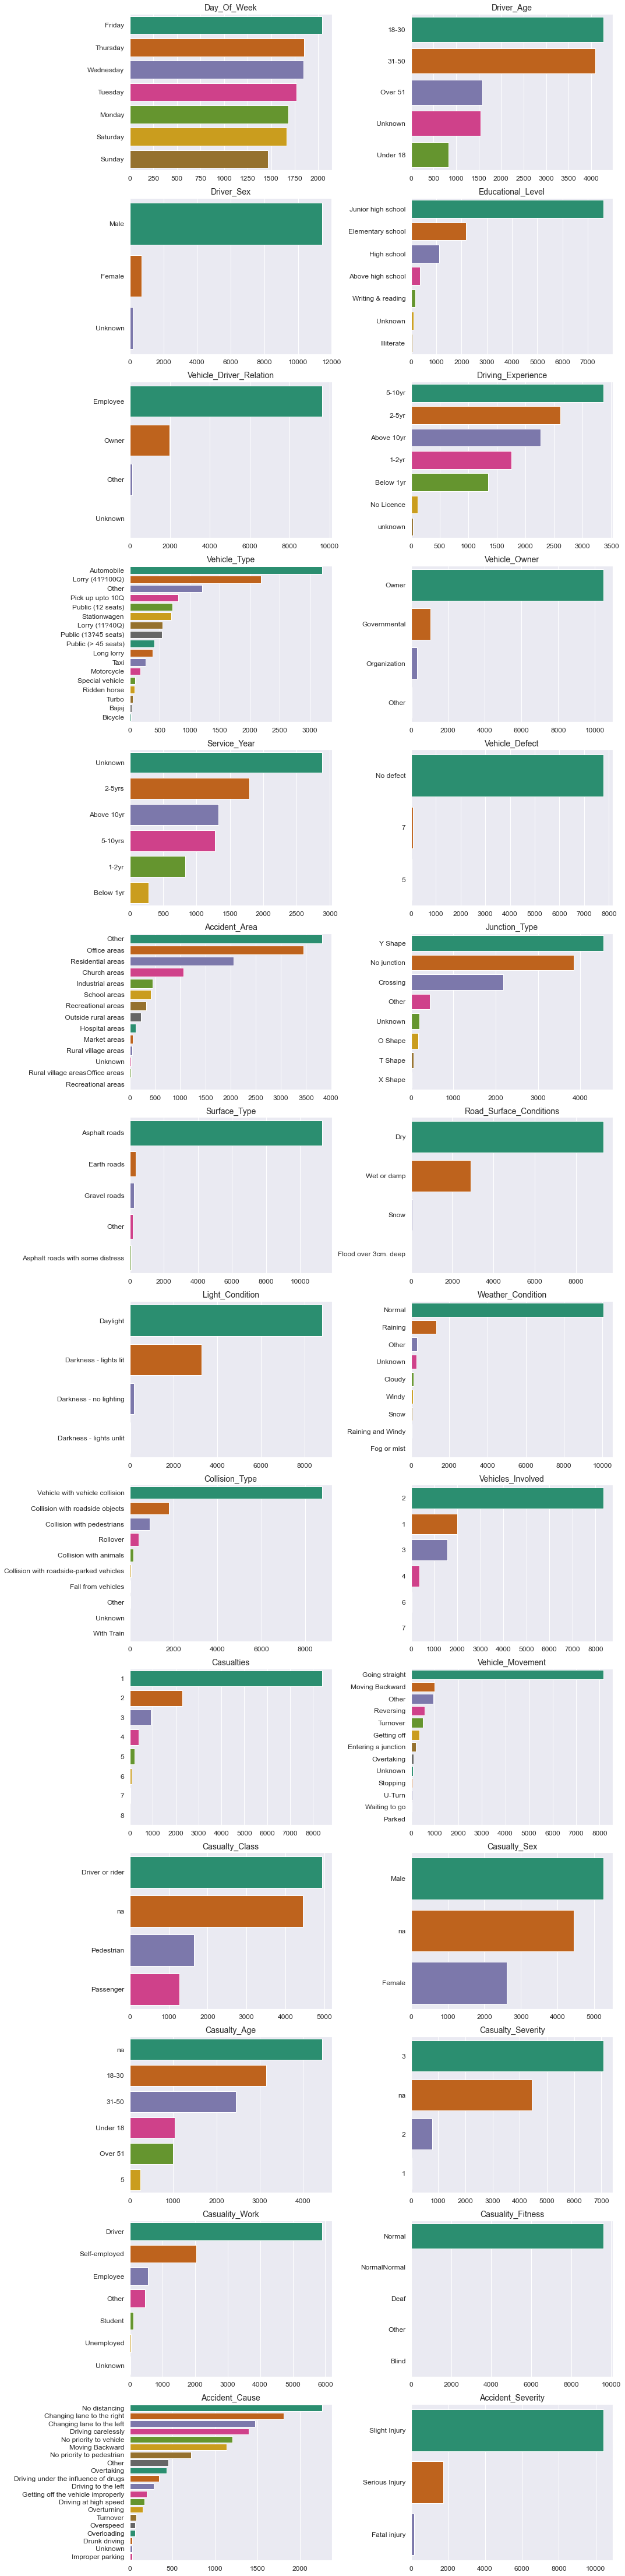

In [137]:
plt.figure(figsize=(15,70))
plotnumber=1

for col in file.drop(["hour","minute","lanes","road_allignment","pedestrian_movement"],axis=1):
    if plotnumber <= file.shape[1]:
        ax1=plt.subplot(16,2,plotnumber)
        order = file[col].value_counts().index
        sns.countplot(data=file,y=col, palette='Dark2',order=order)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber+=1
plt.tight_layout()   
plt.show()

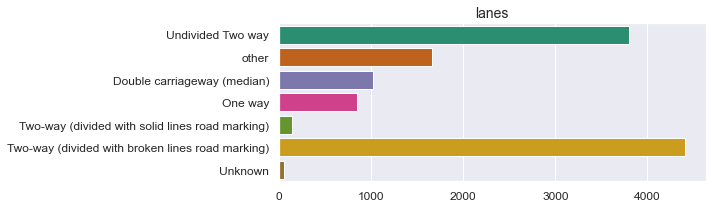

In [138]:
 
plt.figure(figsize=(10,3))
sns.countplot(data=file,y='lanes', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("lanes", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()    

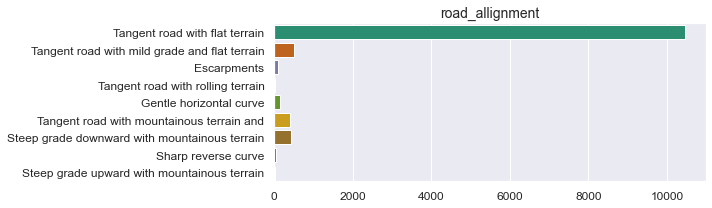

In [139]:
plt.figure(figsize=(10,3))
sns.countplot(data=file,y='road_allignment', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("road_allignment", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()  

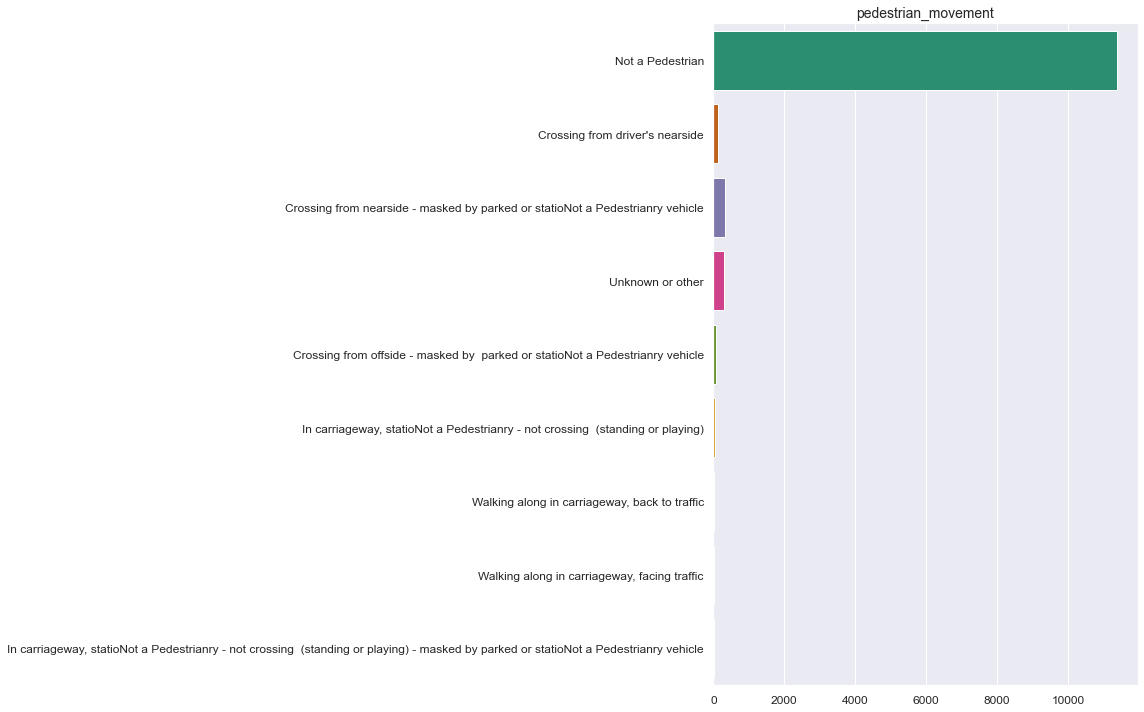

In [140]:
plt.figure(figsize=(16,10))
sns.countplot(data=file,y='pedestrian_movement', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("pedestrian_movement", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout() 
plt.show()

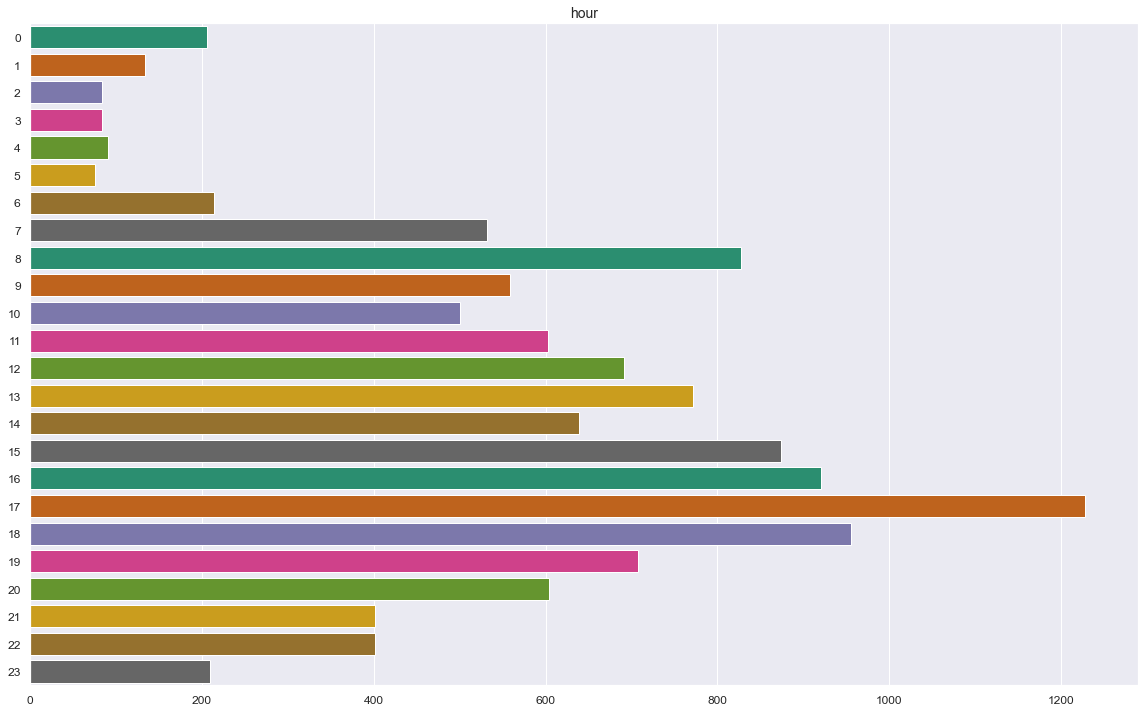

In [141]:
plt.figure(figsize=(16,10))
sns.countplot(data=file,y='hour', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("hour", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout() 
plt.show()

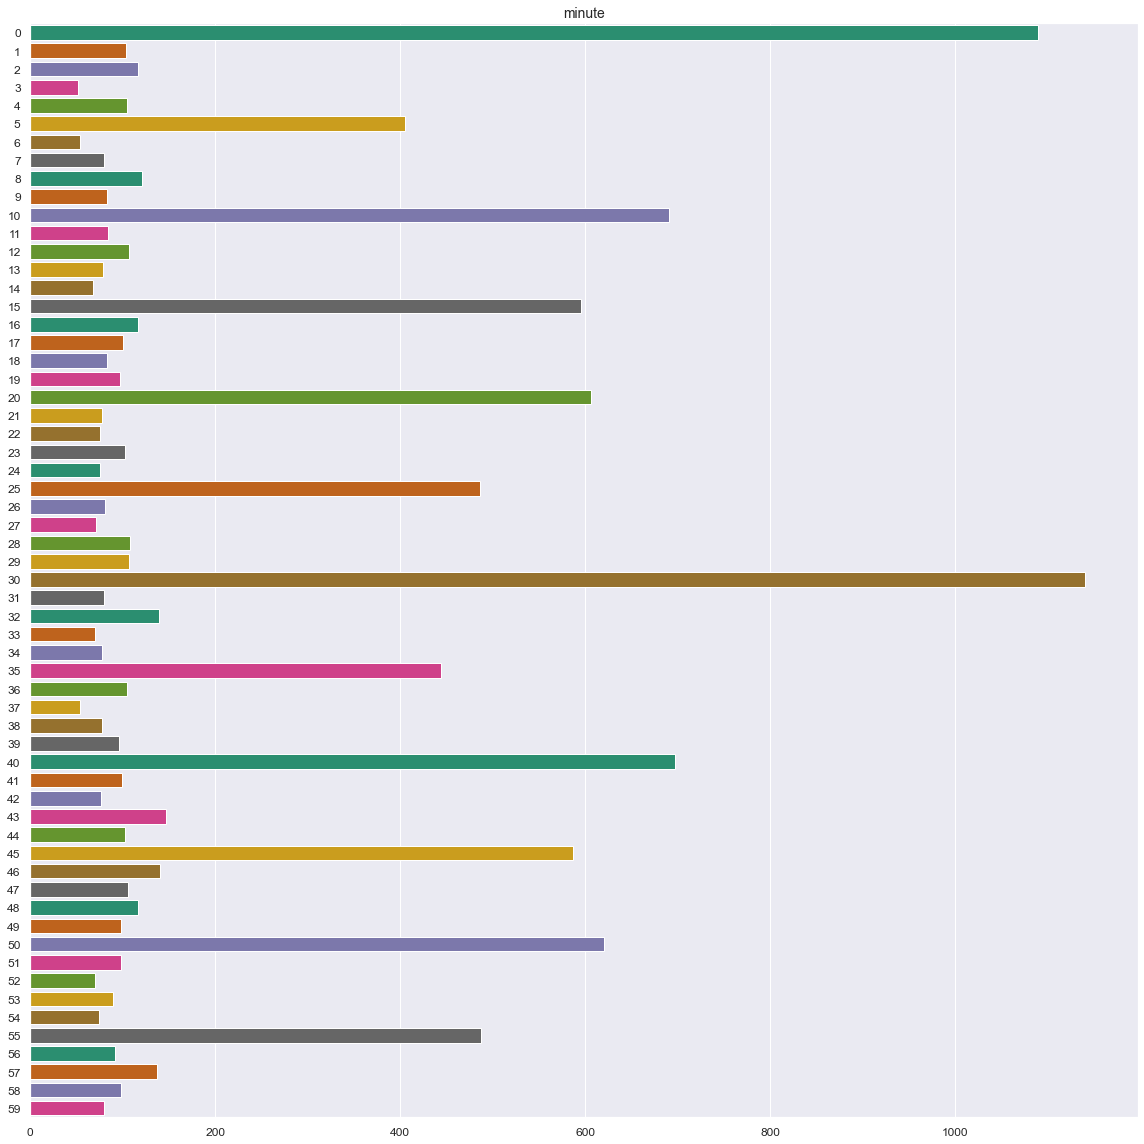

In [142]:
plt.figure(figsize=(16,16))
sns.countplot(data=file,y='minute',palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("minute", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout() 
plt.show()

## Observations
* Most of the accidents are fatal injury
* Most of the accident happens between 3 pm to 6 pm 
* Mostly at 0th, 10th and 15th min of interval.
* The driver are mostly employee of age 18 to 50 Male with 5-10 yrs of driving experience.
* The cause of accident are mostly no distancing, and while changing lane to left or right.
* The area of this accident is mostly near office and residential area where the surface of road is dry.
* The accidents happend mostly during day time.

In [143]:
import dabl

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [145]:
X,y = load_digits(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
sc=  dabl.SimpleClassifier().fit(X_train,y_train)
print(sc.score)

Running DummyClassifier()
accuracy: 0.106 recall_macro: 0.100 precision_macro: 0.011 f1_macro: 0.019
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.106 recall_macro: 0.100 precision_macro: 0.011 f1_macro: 0.019

Running GaussianNB()
accuracy: 0.827 recall_macro: 0.829 precision_macro: 0.847 f1_macro: 0.824
=== new best GaussianNB() (using recall_macro):
accuracy: 0.827 recall_macro: 0.829 precision_macro: 0.847 f1_macro: 0.824

Running MultinomialNB()
accuracy: 0.896 recall_macro: 0.898 precision_macro: 0.903 f1_macro: 0.897
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.896 recall_macro: 0.898 precision_macro: 0.903 f1_macro: 0.897

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.196 recall_macro: 0.199 precision_macro: 0.076 f1_macro: 0.099
Running DecisionTreeClassifier(class_weight='balanced', max_depth=10)
accuracy: 0.843 recall_macro: 0.844 precision_macro: 0.847 f1_macro: 0.844
Running DecisionTreeClassifier(clas

Target looks like classification
Showing only top 10 of 33 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='accident_severity'>,
 [array([[<Axes: xlabel='hour', ylabel='hour'>]], dtype=object)],
 array([[<Axes: title={'center': 'minute'}>,
         <Axes: title={'center': 'vehicles_involved'}>,
         <Axes: title={'center': 'casualties'}>,
         <Axes: title={'center': 'junction_type'}>,
         <Axes: title={'center': 'driver_Age'}>],
        [<Axes: title={'center': 'Weather_condition'}>,
         <Axes: title={'center': 'vehicle_type'}>,
         <Axes: title={'center': 'accident_area'}>,
         <Axes: title={'center': 'accident_cause'}>,
         <Axes: title={'center': 'day_of_week'}>]], dtype=object)]

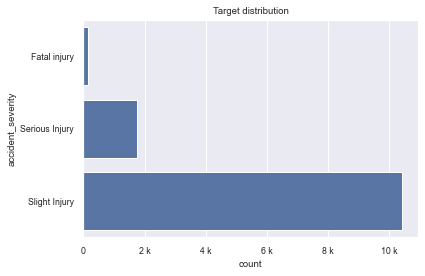

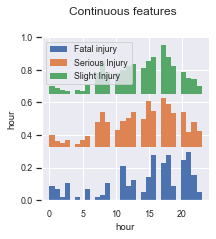

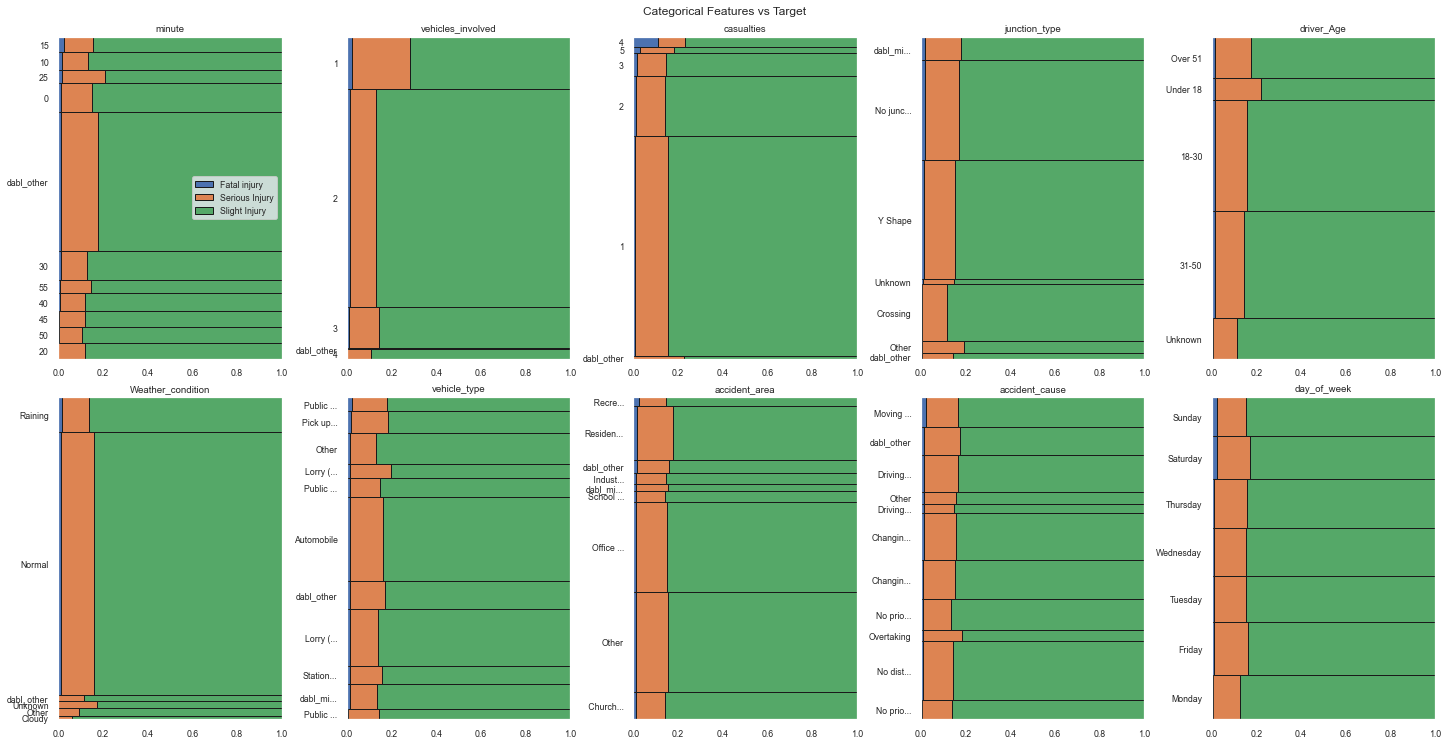

In [146]:
dabl.plot(file,"accident_severity")

## Preprocessing

In [147]:
file.dtypes

day_of_week                object
driver_Age                 object
driver_sex                 object
educational_level          object
vehicle_driver_relation    object
driving_experience         object
vehicle_type               object
vehicle_owner              object
Service_year               object
vehicle_defect             object
accident_area              object
lanes                      object
road_allignment            object
junction_type              object
surface_type               object
road_surface_conditions    object
light_condition            object
Weather_condition          object
collision_type             object
vehicles_involved           int64
casualties                  int64
vehicle_movement           object
casualty_class             object
casualty_sex               object
casualty_age               object
casualty_severity          object
casuality_work             object
casuality_fitness          object
pedestrian_movement        object
accident_cause

## Missing Values

In [148]:
file.isnull().sum()

day_of_week                   0
driver_Age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
Service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
Weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casuality_work             3198
casuality_fitness          2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [149]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day_of_week              12316 non-null  object
 1   driver_Age               12316 non-null  object
 2   driver_sex               12316 non-null  object
 3   educational_level        11575 non-null  object
 4   vehicle_driver_relation  11737 non-null  object
 5   driving_experience       11487 non-null  object
 6   vehicle_type             11366 non-null  object
 7   vehicle_owner            11834 non-null  object
 8   Service_year             8388 non-null   object
 9   vehicle_defect           7889 non-null   object
 10  accident_area            12077 non-null  object
 11  lanes                    11931 non-null  object
 12  road_allignment          12174 non-null  object
 13  junction_type            11429 non-null  object
 14  surface_type             12144 non-nul

In [150]:
file.head()

day_of_week driver_Age driver_sex   educational_level  \
0      Monday      18-30       Male   Above high school   
1      Monday      31-50       Male  Junior high school   
2      Monday      18-30       Male  Junior high school   
3      Sunday      18-30       Male  Junior high school   
4      Sunday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  vehicle_owner Service_year vehicle_defect         accident_area  \
0         Owner   Above 10yr      No defect     Residential areas   
1         Owner      5-10yrs      No defect          Office areas   
2         Owner          NaN      No defect    Recreational areas   
3  Governmental          NaN      No defect          Office areas   
4         Owner      5-10yrs      No defect      Industrial areas   

               lanes                                road_allignment  \
0                NaN                 Tangent road with flat terrain   
1  Undivided Two way                 Tangent road with flat terrain   
2              other                                            NaN   
3              other  Tangent road with mild grade and flat terrain   
4              other                 Tangent road with flat terrain   

  junction_type   surface_type road_surface_conditions        light_condition  \
0   No junction  Asphalt roads                     Dry               Daylight   
1   No junction  Asphalt roads                     Dry               Daylight   
2   No junction  Asphalt roads                     Dry               Daylight   
3       Y Shape    Earth roads                     Dry  Darkness - lights lit   
4       Y Shape  Asphalt roads                     Dry  Darkness - lights lit   

  Weather_condition                           collision_type  \
0            Normal  Collision with roadside-parked vehicles   
1            Normal           Vehicle with vehicle collision   
2            Normal          Collision with roadside objects   
3            Normal           Vehicle with vehicle collision   
4            Normal           Vehicle with vehicle collision   

   vehicles_involved  casualties vehicle_movement   casualty_class  \
0                  2           2   Going straight               na   
1                  2           2   Going straight               na   
2                  2           2   Going straight  Driver or rider   
3                  2           2   Going straight       Pedestrian   
4                  2           2   Going straight               na   

  casualty_sex casualty_age casualty_severity casuality_work  \
0           na           na                na            NaN   
1           na           na                na            NaN   
2         Male        31-50                 3         Driver   
3       Female        18-30                 3         Driver   
4           na           na                na            NaN   

  casuality_fitness pedestrian_movement              accident_cause  \
0               NaN    Not a Pedestrian             Moving Backward   
1               NaN    Not a Pedestrian                  Overtaking   
2               NaN    Not a Pedestrian   Changing lane to the left   
3            Normal    Not a Pedestrian  Changing lane to the right   
4               NaN    Not a Pedestrian                  Overtaking   

  accident_severity  hour  minute  
0     Slight Injury    17       2  
1     Slight Injury    17       2  
2    Serious Injury    17       2  
3     Slight Injury     1       6  
4     Slight Injury     1       6

In [151]:
file.accident_area.value_counts()

accident_area
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [152]:
file.vehicle_defect.value_counts()


vehicle_defect
No defect    7777
7              76
5              36
Name: count, dtype: int64

In [153]:
def missing_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table= pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table = mis_val_table.rename(columns={0:"Missing_val",1:"% of total Values"})
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1]!=0].sort_values("% of total Values",ascending=False).round(1)
    return mis_val_table
    

In [154]:
x = missing_values_table(file)
x

Missing_val  % of total Values
vehicle_defect                  4427               35.9
Service_year                    3928               31.9
casuality_work                  3198               26.0
casuality_fitness               2635               21.4
vehicle_type                     950                7.7
junction_type                    887                7.2
driving_experience               829                6.7
educational_level                741                6.0
vehicle_driver_relation          579                4.7
vehicle_owner                    482                3.9
lanes                            385                3.1
vehicle_movement                 308                2.5
accident_area                    239                1.9
surface_type                     172                1.4
collision_type                   155                1.3
road_allignment                  142                1.2

In [155]:
file.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casuality_work', 'casuality_fitness'], inplace=True)

In [156]:
na_cols = [i for i in file.isna().sum()[file.isna().sum()!=0].index.tolist()]
na_cols

['educational_level',
 'driving_experience',
 'vehicle_type',
 'vehicle_owner',
 'Service_year',
 'accident_area',
 'lanes',
 'road_allignment',
 'junction_type',
 'surface_type',
 'collision_type',
 'vehicle_movement']

In [157]:
v = [i for i in file.isna().sum()[file.isna().sum()!=0].index.to_list()]
for x in v:
    mode = file[x].mode()[0]
    file[x].fillna(mode,inplace=True)


In [158]:
file.surface_type.mode()[0]            

'Asphalt roads'

In [159]:
file.isna().sum()

day_of_week                0
driver_Age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
Service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
Weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

# Duplicate Values

In [160]:
file.duplicated().sum()

0

# Statistical discription

In [161]:
file.describe()

vehicles_involved    casualties          hour        minute
count       12316.000000  12316.000000  12316.000000  12316.000000
mean            2.040679      1.548149     13.835823     27.696736
std             0.688790      1.007179      5.202923     17.482604
min             1.000000      1.000000      0.000000      0.000000
25%             2.000000      1.000000     10.000000     12.000000
50%             2.000000      1.000000     15.000000     30.000000
75%             2.000000      2.000000     18.000000     43.000000
max             7.000000      8.000000     23.000000     59.000000

## Plots

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day_of_week              12316 non-null  object
 1   driver_Age               12316 non-null  object
 2   driver_sex               12316 non-null  object
 3   educational_level        12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   vehicle_type             12316 non-null  object
 6   vehicle_owner            12316 non-null  object
 7   Service_year             12316 non-null  object
 8   accident_area            12316 non-null  object
 9   lanes                    12316 non-null  object
 10  road_allignment          12316 non-null  object
 11  junction_type            12316 non-null  object
 12  surface_type             12316 non-null  object
 13  road_surface_conditions  12316 non-null  object
 14  light_condition          12316 non-nul

 ## Encoding

In [164]:
file.shape

(12316, 29)

In [165]:
file.drop(['accident_severity'], axis=1).columns

Index(['day_of_week', 'driver_Age', 'driver_sex', 'educational_level',
       'driving_experience', 'vehicle_type', 'vehicle_owner', 'Service_year',
       'accident_area', 'lanes', 'road_allignment', 'junction_type',
       'surface_type', 'road_surface_conditions', 'light_condition',
       'Weather_condition', 'collision_type', 'vehicles_involved',
       'casualties', 'vehicle_movement', 'casualty_class', 'casualty_sex',
       'casualty_age', 'casualty_severity', 'pedestrian_movement',
       'accident_cause', 'hour', 'minute'],
      dtype='object')

In [166]:
## ************************* Trial *********************************************************************************************

In [167]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [168]:
list(np.arange(file["casualty_severity"].nunique()))

[0, 1, 2, 3]

In [169]:
feat_val = list(np.arange(file["collision_type"].nunique()))
feat_key = list(file["collision_type"].sort_values().unique())
feat_dict = dict(zip(feat_key, feat_val))
feat_dict

{'Collision with animals': 0,
 'Collision with pedestrians': 1,
 'Collision with roadside objects': 2,
 'Collision with roadside-parked vehicles': 3,
 'Fall from vehicles': 4,
 'Other': 5,
 'Rollover': 6,
 'Unknown': 7,
 'Vehicle with vehicle collision': 8,
 'With Train': 9}

In [170]:
file["collision_type"].map(feat_dict)

0        3
1        8
2        2
3        8
4        8
        ..
12311    8
12312    8
12313    8
12314    8
12315    8
Name: collision_type, Length: 12316, dtype: int32

In [171]:
new = file.copy()

In [172]:
a= file.drop(["accident_severity"],axis=1).columns

In [173]:
file["educational_level"].sort_values().unique()

array(['Above high school', 'Elementary school', 'High school',
       'Illiterate', 'Junior high school', 'Unknown', 'Writing & reading'],
      dtype=object)

In [174]:
## ************************* Trial *********************************************************************************************

In [175]:
def ordinal_encoder(file,f):
    for i in f:
        feat_val = list(np.arange(file[i].nunique()))
        feat_key = list(file[i].sort_values().unique())
        feat_dict = dict(zip(feat_key,feat_val))
        file[i]=file[i].map(feat_dict)
    return file
        
file = ordinal_encoder(file,file.drop(["accident_severity"],axis=1).columns)
file.shape
        
    

(12316, 29)

In [176]:
new.head()

day_of_week driver_Age driver_sex   educational_level driving_experience  \
0      Monday      18-30       Male   Above high school              1-2yr   
1      Monday      31-50       Male  Junior high school         Above 10yr   
2      Monday      18-30       Male  Junior high school              1-2yr   
3      Sunday      18-30       Male  Junior high school             5-10yr   
4      Sunday      18-30       Male  Junior high school              2-5yr   

          vehicle_type vehicle_owner Service_year         accident_area  \
0           Automobile         Owner   Above 10yr     Residential areas   
1  Public (> 45 seats)         Owner      5-10yrs          Office areas   
2      Lorry (41?100Q)         Owner      Unknown    Recreational areas   
3  Public (> 45 seats)  Governmental      Unknown          Office areas   
4           Automobile         Owner      5-10yrs      Industrial areas   

                                              lanes  \
0  Two-way (divided with broken lines road marking)   
1                                 Undivided Two way   
2                                             other   
3                                             other   
4                                             other   

                                 road_allignment junction_type   surface_type  \
0                 Tangent road with flat terrain   No junction  Asphalt roads   
1                 Tangent road with flat terrain   No junction  Asphalt roads   
2                 Tangent road with flat terrain   No junction  Asphalt roads   
3  Tangent road with mild grade and flat terrain       Y Shape    Earth roads   
4                 Tangent road with flat terrain       Y Shape  Asphalt roads   

  road_surface_conditions        light_condition Weather_condition  \
0                     Dry               Daylight            Normal   
1                     Dry               Daylight            Normal   
2                     Dry               Daylight            Normal   
3                     Dry  Darkness - lights lit            Normal   
4                     Dry  Darkness - lights lit            Normal   

                            collision_type  vehicles_involved  casualties  \
0  Collision with roadside-parked vehicles                  2           2   
1           Vehicle with vehicle collision                  2           2   
2          Collision with roadside objects                  2           2   
3           Vehicle with vehicle collision                  2           2   
4           Vehicle with vehicle collision                  2           2   

  vehicle_movement   casualty_class casualty_sex casualty_age  \
0   Going straight               na           na           na   
1   Going straight               na           na           na   
2   Going straight  Driver or rider         Male        31-50   
3   Going straight       Pedestrian       Female        18-30   
4   Going straight               na           na           na   

  casualty_severity pedestrian_movement              accident_cause  \
0                na    Not a Pedestrian             Moving Backward   
1                na    Not a Pedestrian                  Overtaking   
2                 3    Not a Pedestrian   Changing lane to the left   
3                 3    Not a Pedestrian  Changing lane to the right   
4                na    Not a Pedestrian                  Overtaking   

  accident_severity  hour  minute  
0     Slight Injury    17       2  
1     Slight Injury    17       2  
2    Serious Injury    17       2  
3     Slight Injury     1       6  
4     Slight Injury     1       6

In [177]:
 file["light_condition"]

0        3
1        3
2        3
3        0
4        0
        ..
12311    3
12312    3
12313    3
12314    0
12315    0
Name: light_condition, Length: 12316, dtype: int32

In [178]:
file.head()

day_of_week  driver_Age  driver_sex  educational_level  driving_experience  \
0            1           0           1                  0                   0   
1            1           1           1                  4                   3   
2            1           0           1                  4                   0   
3            3           0           1                  4                   2   
4            3           0           1                  4                   1   

   vehicle_type  vehicle_owner  Service_year  accident_area  lanes  \
0             0              3             3              9      2   
1            11              3             2              6      4   
2             5              3             5              1      6   
3            11              0             5              6      6   
4             0              3             2              4      6   

   road_allignment  junction_type  surface_type  road_surface_conditions  \
0                5              1             0                        0   
1                5              1             0                        0   
2                5              1             0                        0   
3                6              7             2                        0   
4                5              7             0                        0   

   light_condition  Weather_condition  collision_type  vehicles_involved  \
0                3                  2               3                  1   
1                3                  2               8                  1   
2                3                  2               2                  1   
3                0                  2               8                  1   
4                0                  2               8                  1   

   casualties  vehicle_movement  casualty_class  casualty_sex  casualty_age  \
0           1                 2               3             2             5   
1           1                 2               3             2             5   
2           1                 2               0             1             1   
3           1                 2               2             0             0   
4           1                 2               3             2             5   

   casualty_severity  pedestrian_movement  accident_cause accident_severity  \
0                  3                    5               9     Slight Injury   
1                  3                    5              16     Slight Injury   
2                  2                    5               0    Serious Injury   
3                  2                    5               1     Slight Injury   
4                  3                    5              16     Slight Injury   

   hour  minute  
0    17       2  
1    17       2  
2    17       2  
3     1       6  
4     1       6

## Hypothesis

## Which of both genders is actually dangerous in Driving?

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 1: Which of both genders is actually dangerous in Driving?</font></h2>
    
<font color='#0080FF'><b>Calculating the Conditional Probability; Probability of an Accident Happen When the Driver is a Female and Repeating the Calculations when it's Male.<br>
P(Gender = Male | Severity = 2) P(Gender = Female | Severity = 2)</b></font>

In [179]:
new["driver_sex"].count()

12316

In [180]:
((new.groupby(['driver_sex']).size() / new["driver_sex"].count()) * 100).add_prefix("Accident in % caused by ")

driver_sex
Accident in % caused by Female      5.691783
Accident in % caused by Male       92.862943
Accident in % caused by Unknown     1.445274
dtype: float64

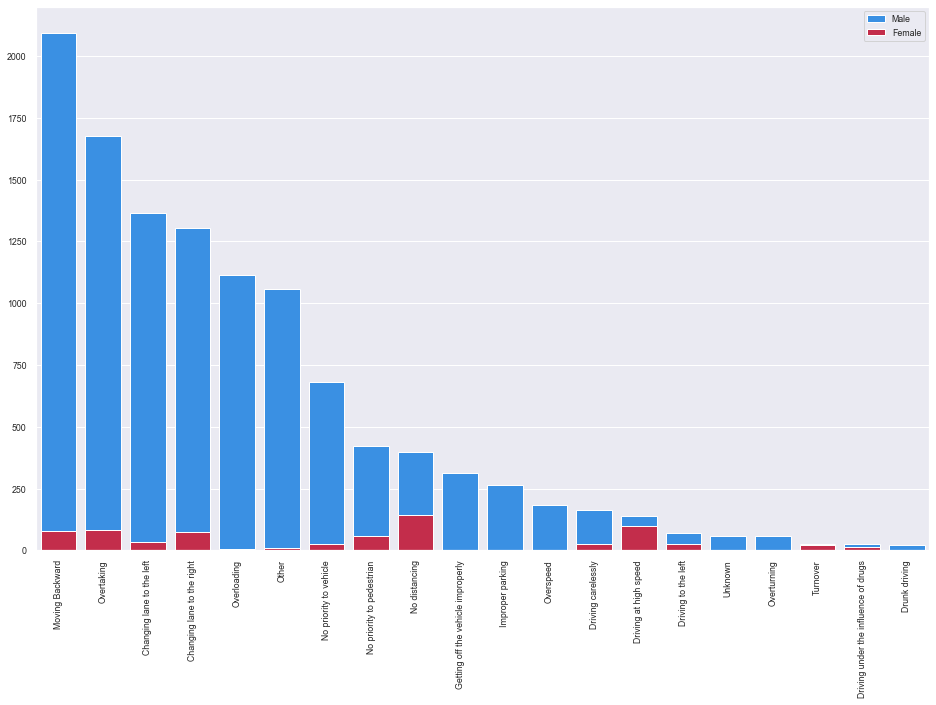

In [181]:
plt.figure(figsize=(16,10))
male_df = new.loc[new.driver_sex=="Male"]
female_df = new.loc[new.driver_sex=="Female"]
sns.barplot(x= male_df.accident_cause.unique(),y= male_df.accident_cause.value_counts().values, color="dodgerblue", label="Male" )
sns.barplot(x=female_df.accident_cause.unique(),y = female_df.accident_cause.value_counts().values,color='crimson', label="Female")

plt.xticks(rotation=90)
plt.legend()
plt.show()


In [182]:
 male_df.shape


(11437, 29)

In [183]:
male_df.accident_cause.unique().shape

(20,)

In [184]:
cross= pd.crosstab(index = new["driver_sex"].loc[new["driver_sex"]!='Unknown'],columns=new["accident_severity"],margins=True)
cross

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
driver_sex                                                           
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138

In [185]:
(cross.iloc[0,0])/(cross.iloc[0,3]*1.0)*100

0.7132667617689016

In [186]:
print("P(Gender=female | Severity = Fatal)=" + str((cross.iloc[0,0])/(cross.iloc[0,3])))

P(Gender=female | Severity = Fatal)=0.007132667617689016


In [187]:
print("P(Gender = Female | Severity = Fatal) = " + str((cross.iloc[0,0])/(cross.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((cross.iloc[1,0])/(cross.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((cross.iloc[0,1])/(cross.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((cross.iloc[1,1])/(cross.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((cross.iloc[0,2])/(cross.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((cross.iloc[1,2])/(cross.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


 ## From this we can conclude that through percentage the male ratio of accident is more but if we calculate the probability for each gender then both are same.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 2: Is Speeding is the main Cause for Car Crashes?</font></h2><br>

In [188]:
cross = pd.crosstab(index=new["accident_cause"], columns=new["accident_severity"],margins=True)
cross

accident_severity                     Fatal injury  Serious Injury  \
accident_cause                                                       
Changing lane to the left                       16             206   
Changing lane to the right                      23             260   
Driving at high speed                            2              31   
Driving carelessly                              22             209   
Driving to the left                              4              53   
Driving under the influence of drugs             5              46   
Drunk driving                                    0               3   
Getting off the vehicle improperly               3              29   
Improper parking                                 1               2   
Moving Backward                                 26             162   
No distancing                                   20             303   
No priority to pedestrian                        5              95   
No priority to vehicle                          13             149   
Other                                            7              64   
Overloading                                      2              10   
Overspeed                                        1              15   
Overtaking                                       4              75   
Overturning                                      2              23   
Turnover                                         2               6   
Unknown                                          0               2   
All                                            158            1743   

accident_severity                     Slight Injury    All  
accident_cause                                              
Changing lane to the left                      1251   1473  
Changing lane to the right                     1525   1808  
Driving at high speed                           141    174  
Driving carelessly                             1171   1402  
Driving to the left                             227    284  
Driving under the influence of drugs            289    340  
Drunk driving                                    24     27  
Getting off the vehicle improperly              165    197  
Improper parking                                 22     25  
Moving Backward                                 949   1137  
No distancing                                  1940   2263  
No priority to pedestrian                       621    721  
No priority to vehicle                         1045   1207  
Other                                           385    456  
Overloading                                      47     59  
Overspeed                                        45     61  
Overtaking                                      351    430  
Overturning                                     124    149  
Turnover                                         70     78  
Unknown                                          23     25  
All                                           10415  12316

In [189]:
cross.iloc[-1,-1]

12316

In [190]:
print(f" Injuries due to all types of speeding :{(cross.iloc[2,0]+cross.iloc[2,1]+cross.iloc[2,2]+cross.iloc[-6,0]+cross.iloc[-6,1]+cross.iloc[-6,2])/cross.iloc[-1,-1] *100} %")

 Injuries due to all types of speeding :1.908087041247158 %


In [191]:
print(f" Injuries due to changing lane : {(cross.iloc[0,0]+ cross.iloc[0,1]+ cross.iloc[0,2]+ cross.iloc[1,0]+cross.iloc[1,1]+cross.iloc[1,2])/cross.iloc[-1,-1]*100}%")

 Injuries due to changing lane : 26.64014290354011%


### From this the accident are not caused due to speeding but most accidents are cause due to changing lane

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 3: Do weekends account for more accidents?</font></h2><br>

In [192]:
cross = pd.crosstab(index = new["day_of_week"],columns= new["accident_severity"],margins=True)
cross

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
day_of_week                                                          
Friday                       16             313           1712   2041
Monday                       12             204           1465   1681
Saturday                     37             245           1384   1666
Sunday                       35             190           1242   1467
Thursday                     22             272           1557   1851
Tuesday                      17             257           1496   1770
Wednesday                    19             262           1559   1840
All                         158            1743          10415  12316

In [193]:
cross.index[2]

'Saturday'

In [194]:
print("Accidents caused on weekdays:",round(sum(cross.iloc[i,3] for i in range(0,7) if cross.index[i] not in ['Saturday','Sunday'])/cross.iloc[7,3],2))

Accidents caused on weekdays: 0.75


In [195]:
cross.iloc[7,3],2

(12316, 2)

In [196]:
print('Accident percentage on weekends:',round(sum([cross.iloc[i,3] for i in range(0,7) if cross.index[i] in ['Saturday','Sunday']])/cross.iloc[7,3],2))


Accident percentage on weekends: 0.25


### Majortiy of accidents happens on weekdays

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 4: Are there more dangerous injuries at night than in day? </font></h2><br>
<font color='#0080FF'>We would consider both fatal and serious to be dangerous injuries</font>

In [197]:
cross = pd.crosstab(index=new["light_condition"], columns = new["accident_severity"], margins=True)
cross

accident_severity        Fatal injury  Serious Injury  Slight Injury    All
light_condition                                                            
Darkness - lights lit              66             465           2755   3286
Darkness - lights unlit             0               7             33     40
Darkness - no lighting              5              49            138    192
Daylight                           87            1222           7489   8798
All                               158            1743          10415  12316

In [198]:
var=0
for i in [0,1]:
    for j in [0,1,2]:
        var+=cross.iloc[j,i]
        
print(f"Night Serious injuries:{round(var/(sum(cross.iloc[i,3] for i in [0,1,2])) ,2)}% ")

print(f"Night slight injuries : {round(sum(cross.iloc[i,2] for i in [0,1,2])/sum(cross.iloc[j,3]for j in [0,1,2]),2)}%")

Night Serious injuries:0.17% 
Night slight injuries : 0.83%


In [199]:
print(f"Dangerous injury at Day: {round(sum(cross.iloc[3,i] for i in [0,1])/cross.iloc[3,3],2)}%")
print(f"Slight injury at Day: {round(cross.iloc[3,2]/cross.iloc[3,3],2)}%")

Dangerous injury at Day: 0.15%
Slight injury at Day: 0.85%


 ### The slight injuries are more during day or night

 <div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 5: More accidents under some specific non-normal weather? </font></h2><br>
<font color='#0080FF'>We would not consider normal weather</font>

In [200]:
cross = pd.crosstab(index=new["Weather_condition"],columns = new["accident_severity"],margins=True)
cross

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
Weather_condition                                                    
Cloudy                        0               8            117    125
Fog or mist                   0               1              9     10
Normal                      135            1474           8454  10063
Other                         0              28            268    296
Raining                      23             158           1150   1331
Raining and Windy             0               2             38     40
Snow                          0               5             56     61
Unknown                       0              51            241    292
Windy                         0              16             82     98
All                         158            1743          10415  12316

In [201]:
cross.drop(["Normal","All"],axis=0)

accident_severity  Fatal injury  Serious Injury  Slight Injury   All
Weather_condition                                                   
Cloudy                        0               8            117   125
Fog or mist                   0               1              9    10
Other                         0              28            268   296
Raining                      23             158           1150  1331
Raining and Windy             0               2             38    40
Snow                          0               5             56    61
Unknown                       0              51            241   292
Windy                         0              16             82    98

 ### The reason for accident is due to  rainy season

In [202]:
new_file = file.drop(["accident_severity"],axis=1)
new_file

day_of_week  driver_Age  driver_sex  educational_level  \
0                1           0           1                  0   
1                1           1           1                  4   
2                1           0           1                  4   
3                3           0           1                  4   
4                3           0           1                  4   
...            ...         ...         ...                ...   
12311            6           1           1                  4   
12312            3           4           1                  1   
12313            3           2           1                  4   
12314            3           0           0                  4   
12315            3           0           1                  4   

       driving_experience  vehicle_type  vehicle_owner  Service_year  \
0                       0             0              3             3   
1                       3            11              3             2   
2                       0             5              3             5   
3                       2            11              0             5   
4                       1             0              3             2   
...                   ...           ...            ...           ...   
12311                   1             4              3             5   
12312                   2             0              3             5   
12313                   2             1              3             1   
12314                   3             5              3             1   
12315                   2             7              3             1   

       accident_area  lanes  road_allignment  junction_type  surface_type  \
0                  9      2                5              1             0   
1                  6      4                5              1             0   
2                  1      6                5              1             0   
3                  6      6                6              7             2   
4                  4      6                5              7             0   
...              ...    ...              ...            ...           ...   
12311              5      4                5              1             0   
12312              5      2                0              1             0   
12313              5      2                7              1             0   
12314              6      4                7              1             0   
12315              5      4                7              2             0   

       road_surface_conditions  light_condition  Weather_condition  \
0                            0                3                  2   
1                            0                3                  2   
2                            0                3                  2   
3                            0                0                  2   
4                            0                0                  2   
...                        ...              ...                ...   
12311                        0                3                  2   
12312                        0                3                  2   
12313                        0                3                  2   
12314                        0                0                  2   
12315                        0                0                  2   

       collision_type  vehicles_involved  casualties  vehicle_movement  \
0                   3                  1           1                 2   
1                   8                  1           1                 2   
2                   2                  1           1                 2   
3                   8                  1           1                 2   
4                   8                  1           1                 2   
...               ...                ...         ...               ...   
12311               8                  1           0                 2   
123

<Axes: >

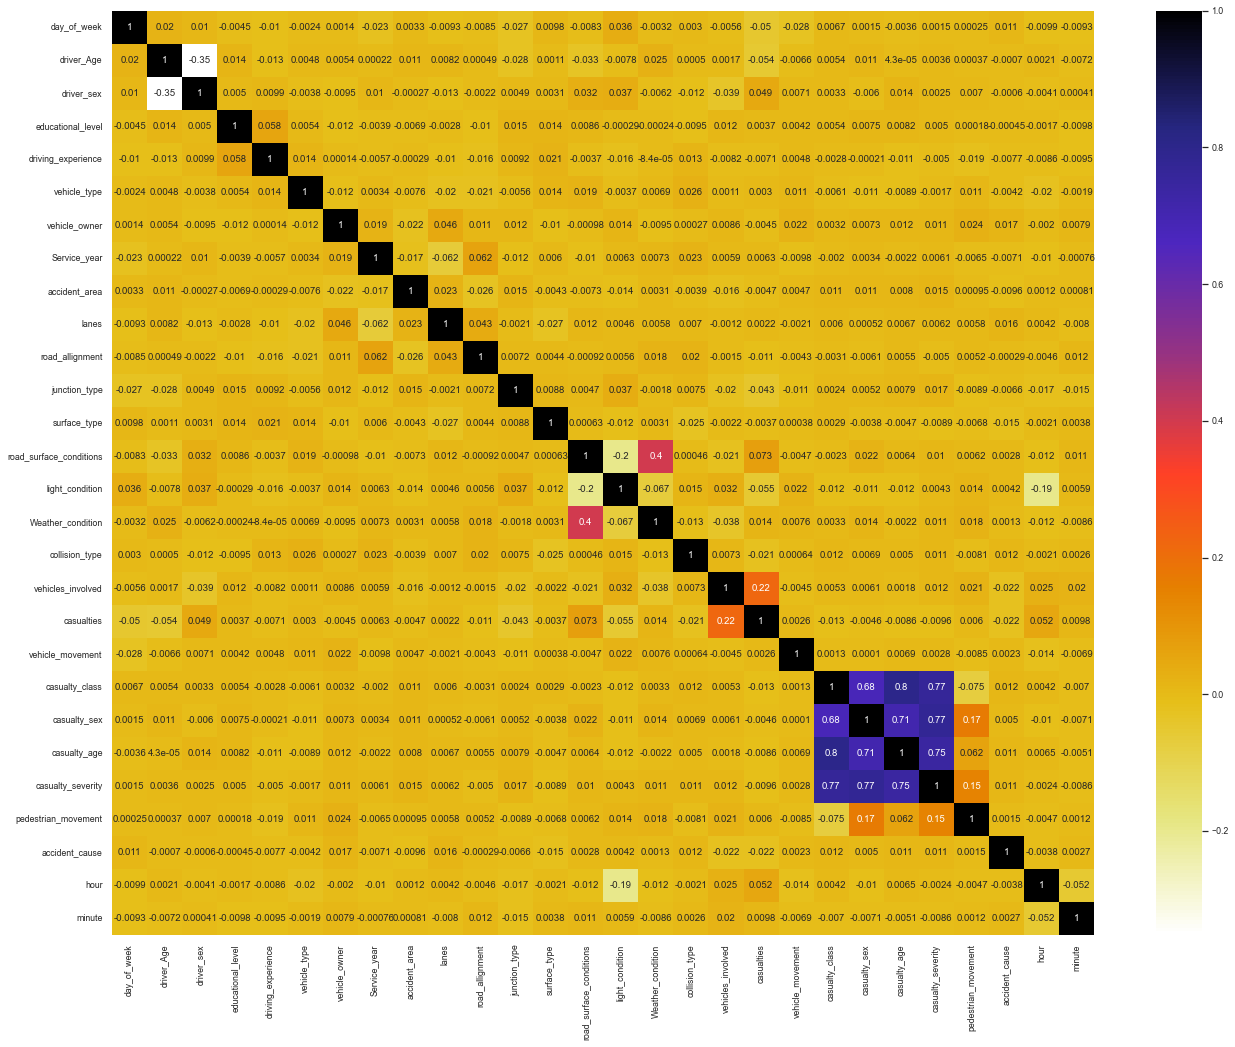

In [203]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(new_file.corr(), annot=True,cmap=plt.cm.CMRmap_r)

In [204]:
file.dtypes

day_of_week                 int32
driver_Age                  int32
driver_sex                  int32
educational_level           int32
driving_experience          int32
vehicle_type                int32
vehicle_owner               int32
Service_year                int32
accident_area               int32
lanes                       int32
road_allignment             int32
junction_type               int32
surface_type                int32
road_surface_conditions     int32
light_condition             int32
Weather_condition           int32
collision_type              int32
vehicles_involved           int32
casualties                  int32
vehicle_movement            int32
casualty_class              int32
casualty_sex                int32
casualty_age                int32
casualty_severity           int32
pedestrian_movement         int32
accident_cause              int32
accident_severity          object
hour                        int32
minute                      int32
dtype: object

In [205]:
file.shape

(12316, 29)

In [206]:
file.head()

day_of_week  driver_Age  driver_sex  educational_level  driving_experience  \
0            1           0           1                  0                   0   
1            1           1           1                  4                   3   
2            1           0           1                  4                   0   
3            3           0           1                  4                   2   
4            3           0           1                  4                   1   

   vehicle_type  vehicle_owner  Service_year  accident_area  lanes  \
0             0              3             3              9      2   
1            11              3             2              6      4   
2             5              3             5              1      6   
3            11              0             5              6      6   
4             0              3             2              4      6   

   road_allignment  junction_type  surface_type  road_surface_conditions  \
0                5              1             0                        0   
1                5              1             0                        0   
2                5              1             0                        0   
3                6              7             2                        0   
4                5              7             0                        0   

   light_condition  Weather_condition  collision_type  vehicles_involved  \
0                3                  2               3                  1   
1                3                  2               8                  1   
2                3                  2               2                  1   
3                0                  2               8                  1   
4                0                  2               8                  1   

   casualties  vehicle_movement  casualty_class  casualty_sex  casualty_age  \
0           1                 2               3             2             5   
1           1                 2               3             2             5   
2           1                 2               0             1             1   
3           1                 2               2             0             0   
4           1                 2               3             2             5   

   casualty_severity  pedestrian_movement  accident_cause accident_severity  \
0                  3                    5               9     Slight Injury   
1                  3                    5              16     Slight Injury   
2                  2                    5               0    Serious Injury   
3                  2                    5               1     Slight Injury   
4                  3                    5              16     Slight Injury   

   hour  minute  
0    17       2  
1    17       2  
2    17       2  
3     1       6  
4     1       6

In [207]:
file.shape

(12316, 29)

## Upsampling

In [208]:
X= file.drop('accident_severity',axis=1)
y= file["accident_severity"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [209]:
from collections import Counter

In [210]:
from imblearn.over_sampling import SMOTE

In [211]:
counter = Counter(y_train)

In [212]:
counter

Counter({'Slight Injury': 7324, 'Serious Injury': 1191, 'Fatal injury': 106})

In [213]:
for i,j in counter.items():
    per = 100*j/len(y_train)
    print(f'class = {i},   n={j},   percent = {round(per,2)}%')

class = Slight Injury,   n=7324,   percent = 84.96%
class = Serious Injury,   n=1191,   percent = 13.82%
class = Fatal injury,   n=106,   percent = 1.23%


In [214]:
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
counter = Counter(y_train)

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class = {k}, values={v}, percentage={per:.2f}")

    


Class = Slight Injury, values=7324, percentage=33.33
Class = Serious Injury, values=7324, percentage=33.33
Class = Fatal injury, values=7324, percentage=33.33


In [215]:
 print(f"X_train shape ={X_train.shape} and y_train shape= {y_train.shape}")

X_train shape =(21972, 28) and y_train shape= (21972,)


In [216]:
y_train.head()

0     Slight Injury
1    Serious Injury
2    Serious Injury
3     Slight Injury
4    Serious Injury
Name: accident_severity, dtype: object

In [217]:
y_test.head()

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
Name: accident_severity, dtype: object

In [218]:
def ordinal_encoder(file,f):
    for i in f:
        feat_val = list(np.arange(file[i].nunique()))
        feat_key = list(file[i].sort_values().unique())
        feat_dict = dict(zip(feat_key,feat_val))
        file[i]=file[i].map(feat_dict)
    return file

In [219]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']


In [220]:
y_train = ordinal_encoder(pd.DataFrame(y_train,columns=["accident_severity"]),pd.DataFrame(y_train,columns=["accident_severity"]).columns)["accident_severity"]

 ## Baseline Modelling

In [221]:
 def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [222]:
scores,models = modelling(X_train,y_train,X_test,y_test,xgb=True,rf=True,extree=True)

In [223]:
print(scores)

{'xgb': [0.7991880920162382], 'rf': [0.8005412719891746], 'extree': [0.8113667117726657]}


In [224]:
models

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
               predictor='auto', ...),
 RandomForestClassifier(n_estimators=200),
 ExtraTreesClassifier()]

In [225]:
 models[0]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [226]:
 models[1]

RandomForestClassifier(n_estimators=200)

In [113]:
models[2]

ExtraTreesClassifier()

In [ ]:
# ***************************************************************************************************************

In [227]:
from sklearn.ensemble import ExtraTreesClassifier

## Evaluation

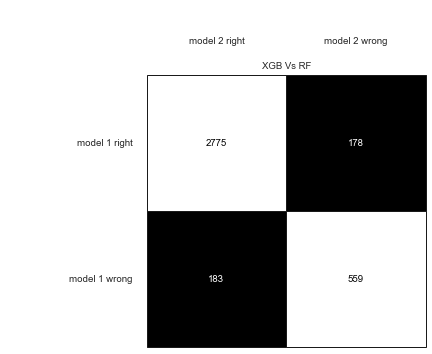

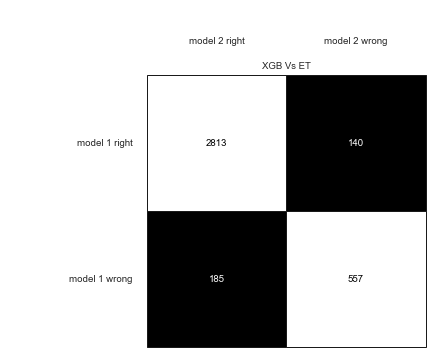

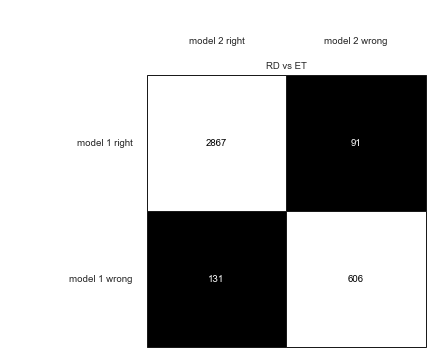

In [114]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


table = mcnemar_tables(y_test, y_pred_xgb, y_pred_rf, y_pred_ext)

board = checkerboard_plot(table['model_0 vs model_1'], 
                         figsize=(5,5), fmt='%d', col_labels=['model 2 right', 'model 2 wrong'],
                        row_labels=['model 1 right', 'model 1 wrong'])
plt.title("XGB Vs RF")
plt.show()

board = checkerboard_plot(table["model_0 vs model_2"], 
                         figsize=(5,5), fmt='%d', col_labels=['model 2 right', 'model 2 wrong'],
                        row_labels=['model 1 right', 'model 1 wrong'])
plt.title("XGB Vs ET")
plt.show()



brd = checkerboard_plot(table['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model 2 right', 'model 2 wrong'],
                        row_labels=['model 1 right', 'model 1 wrong'])
plt.title("RD vs ET")
plt.show()

In [117]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False,text=conf_matrix,hoverinfo='text')

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')
    
  
 
     
     
 

In [118]:
xtree= ExtraTreesClassifier()
xtree.fit(X_train,y_train)
y_pred = xtree.predict(X_test)

In [119]:
a=model_performance(xtree,y_test,y_pred)

## Hyperparameter tuning

In [120]:
cv = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

parameters = {'n_estimators':range(100,500,100),
              'ccp_alpha':[0.0,0.1],
             'criterion':['gini'],
               'max_depth':[5,12],
               'min_samples_split': [2,3]}

model = ExtraTreesClassifier()

gsearch = GridSearchCV(
           estimator = model,
            param_grid = parameters,
            scoring = 'f1_weighted',
            n_jobs=-1, cv=cv, verbose = 1)

extree_model = gsearch.fit(X=X_train, y=y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [121]:
gsearch.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 2,
 'n_estimators': 300}

In [122]:
gsearch.best_score_

0.8841041770089925

In [123]:
cv2 = KFold(n_splits=3, shuffle=True, random_state=43).split(X=X_train, y=y_train)

parameters2 = {
               'max_depth':[11,15],
               'min_samples_split': [2,3],
                 'class_weight':['balanced',None]}

model2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini')

gsearch2 = GridSearchCV(
           estimator = model2,
            param_grid = parameters2,
            scoring = 'f1_weighted',
            n_jobs=-1, cv=cv2, verbose = 3)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [124]:
gsearch2.best_params_

{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 3}

In [125]:
gsearch2.best_score_

0.9170711452506072

In [126]:
model = ExtraTreesClassifier(ccp_alpha =0.0, criterion='gini', min_samples_split= 3, class_weight='balanced',max_depth=15,n_estimators=400)
model.fit(X_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, min_samples_split=3,
                     n_estimators=400)

In [ ]:

['light_condition',
 'casualties',
 'vehicles_involved',
 'driver_Age',
 'minute',
 'day_of_week',
 'driving_experience',
 'road_surface_conditions',
 'junction_type',
 'hour']

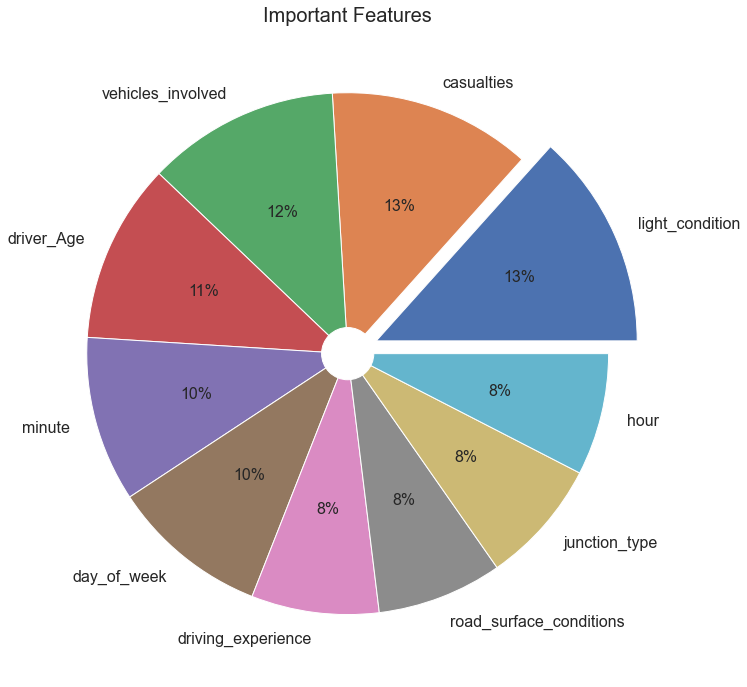

In [127]:
imp_feature = pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(12,12))
myexplode=[0.12,0,0,0,0,0,0,0,0,0]
plt.pie(imp_feature.nlargest(10),labels=imp_feature.nlargest(10).index, autopct='%.0f%%', explode=myexplode,textprops={'fontsize':16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important Features',fontsize=20)
plt.show()

In [128]:
important = pd.DataFrame()
important['feature'] = X.columns
important['Importance'] = model.feature_importances_


In [129]:
important.sort_values(by='Importance',ascending=False)

feature  Importance
14          light_condition    0.071816
18               casualties    0.067577
17        vehicles_involved    0.064126
1                driver_Age    0.059837
27                   minute    0.055106
0               day_of_week    0.052490
4        driving_experience    0.042491
13  road_surface_conditions    0.041736
11            junction_type    0.041577
26                     hour    0.040630
9                     lanes    0.038924
21             casualty_sex    0.036788
25           accident_cause    0.036351
7              Service_year    0.034867
20           casualty_class    0.033413
16           collision_type    0.032847
5              vehicle_type    0.030790
3         educational_level    0.029428
22             casualty_age    0.028521
8             accident_area    0.026224
23        casualty_severity    0.024641
6             vehicle_owner    0.021488
19         vehicle_movement    0.018955
15        Weather_condition    0.017103
2                driver_sex    0.016776
10          road_allignment    0.013829
12             surface_type    0.010878
24      pedestrian_movement    0.010792

In [130]:
top_10 = list(important.sort_values('Importance',ascending=False)['feature'].head(10).values)
top_10

['light_condition',
 'casualties',
 'vehicles_involved',
 'driver_Age',
 'minute',
 'day_of_week',
 'driving_experience',
 'road_surface_conditions',
 'junction_type',
 'hour']

In [131]:
df_top10 = X[top_10]
df_top10

light_condition  casualties  vehicles_involved  driver_Age  minute  \
0                    3           1                  1           0       2   
1                    3           1                  1           1       2   
2                    3           1                  1           0       2   
3                    0           1                  1           0       6   
4                    0           1                  1           0       6   
...                ...         ...                ...         ...     ...   
12311                3           0                  1           1      15   
12312                3           0                  1           4       0   
12313                3           0                  0           2      55   
12314                0           0                  1           0      55   
12315                0           0                  1           0      55   

       day_of_week  driving_experience  road_surface_conditions  \
0                1                   0                        0   
1                1                   3                        0   
2                1                   0                        0   
3                3                   2                        0   
4                3                   1                        0   
...            ...                 ...                      ...   
12311            6                   1                        0   
12312            3                   2                        0   
12313            3                   2                        0   
12314            3                   3                        0   
12315            3                   2                        0   

       junction_type  hour  
0                  1    17  
1                  1    17  
2                  1    17  
3                  7     1  
4                  7     1  
...              ...   ...  
12311              1    16  
12312              1    18  
12313              1    13  
12314              1    13  
12315              2    13  

[12316 rows x 10 columns]

In [ ]:
features=['light_condition', 'casualties','vehicles_involved','driver_Age','minute','day_of_week','driving_experience','road_surface_conditions','junction_type','hour']


## Data Splitting

In [132]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(df_top10,y, test_size=0.3, random_state=42)
print(f'X_train={X_train_new.shape}, X_test={X_test_new.shape} , y_train={y_train_new.shape}, y_test={y_test_new.shape}')

X_train=(8621, 10), X_test=(3695, 10) , y_train=(8621,), y_test=(3695,)


In [133]:
## Fitting Model

model.fit(X_train_new,y_train_new)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, min_samples_split=3,
                     n_estimators=400)

In [134]:
y_pred_new = model.predict(X_test_new)
acc = accuracy_score(y_test_new,y_pred_new)
print(f"Accuracy ={acc}")

Accuracy =0.8557510148849797


In [138]:
## Saving Model

# import joblib
# joblib.dump(model,"F:\Guided Project\RTA")

In [136]:
# from joblib import dump

In [139]:
# dump(model,r"F:\Guided Project\RTA")

In [ ]:
# model_loaded = joblib.load('EXTclass.joblib')

In [140]:
# model_loaded.predict(X_test_new)

In [141]:
import joblib

In [145]:
joblib.dump(model,'model.joblib')

['model.joblib']

In [1]:
import sklearn
print(sklearn.__version__)

1.2.0
